In [1]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Onlayn dataset joylashgan manzilini ko'rsatamiaz
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Datasetning har bir qatori bu bitta hudud (mahalla, kvartal, blok) haqida ma'lumot. Dataset 10 ta ustundan iborat:
- `longitude` va `latitude` birgalikda GPS koordinatalar
- `housing_median_age` - uylarning median yoshi
- `total_rooms` - ushbu hududda mavjud jami xonalar
- `total_bedrooms` - ushbu hududda mavjud jami yotoqxonalar
- `population` - hudud aholi soni
- `households` - hududdagi oilalar soni
- `median_income` - median daromad
- `median_house_values` - uylarning median narxi
- `ocean_proximity` - hududning okeanga qanchalik yaqinligi

### ❓ Median va o'rtacha qiymatlar o'rtasida farqni bilasizmi? 

Deylik bizda 10 ta son bor, shu sonlarning o'rtachasini hisoblash uchun avval ularni qo'shamiz keyin esa yig'indini 10 ga bo'almiz.
Median hisoblash uchun esa sonlarni o'sish tartibida tahlaymiz va o'rtadagi sonni olamiz.

![Imgur](https://i.imgur.com/Qkzwv3u.png)

In [3]:
#ma'lumotlarni ko'ramiz yani info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Yuqoridagi natijadan olingan xulosalar:
1. Dataset 20640 qatordan iborat (har bir qator bu alohida hudud (blok, mahalla, kvartal))
2. `total_bedrooms` ustunida ma'lumotlar to'liq emas (20433 qator to'liq, qolgan 207 tasida ma'lumot yo'q)
3. `ocean_proximity` ustunidan boshqa barcha ustunlar sonli.

`ocean_proximity` ustunini ko'ramiz:

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Demak bu ustunda uylarning okeandan qanchalik uzoqligi matn ko'rinishida saqlangan. Har bir matnni tarjima qilishni sizga vazifa qilib qoldiramiz. 
Biz esa ma'lumotlarni tahlil qilishda davom etamiz.

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Yuqoridagi jadvladan qanday xulosalar oldingiz?

Ma'lumotlarni tahlil qilishning yana bir usuli - vizualizasiya

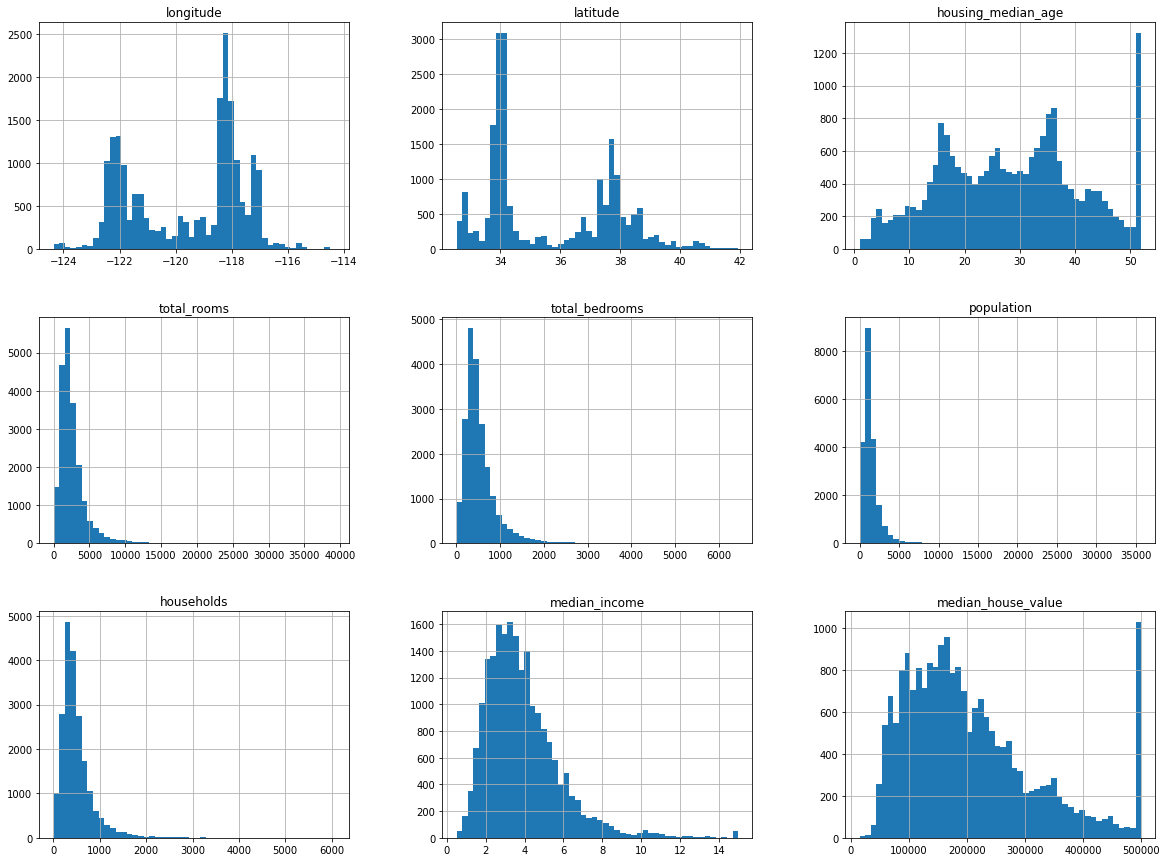

In [6]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

Tahlilda davom etamiz:
1. `median_income` (median daromad) - ustunidagi sonlar tushunarsiz (1 xonali son nimani anglatadi?). Mijoz bilan gaplashgandan so'ng sonlar ming dollarda ekanini bilamiz (ya'ni 4 bu 4000$ degan)
2. `housing_median_age` (uylarning median yoshi) grafikida 50 yoshli uylar birdan oshib ketgan. Mijozda bilan buni aniqlashtiramiz: ma'lumotlar jamlanganda yoshi 50 dan oshgan barcha uylar 50 deb kiritilgan ekan (orasida 60-70-100 yillik ular ham bo'lishi mumkin). Ya'ni ma'lumotlarga chegara belgilangan. 
3. `median_house_value` (uylarning median narhi) da ham shunday holat, ya'ni narhi 500 000\$ dan qimmat uylar hammasi 500ming deb yozib yuborilgan. **Bu esa biz uchun yaxshi emas**. Sababi, bizning qurgan modelimiz 500mingdan qimmat uylarni to'g'ri baholay olmaydi. Oldimizda 2 yo'l bor:
    - Qimmat uylar uchun ma'lumotlarni qayta yig'ish
    - 500mingdan qimmat uylar bor hududlarni datasetdan chiqarib tashlash.
4. Ma'lumotlar taqsimoti bir tomonga og'gan (qo'ng'iroqsimon emas), ML uchun normal taqsimot bo'lgani afzal (buni qanday to'g'rilashni kelgusida ko'ramiz).
![normal taqsimot](https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png)

### 2.2 Trains va Test set.
Esingizda bo'lsa avvalgi modulda ML uchun ma'lumotlarni ikki (aniqro'gi uch) qismga ajratib olishni gaplashgan edik: 
- Train set - model yaratish uchun
- Test set - model aniqligini tekshirish uchun

Aslida, ma'lumotlarni tahlil qilish bosqichida bunga hali ertadek tuyulishi mumkin, lekin bu yerda maqsad nafaqat komyuterni balki bizning ham xato xulosa qilishimizni oldini olish.

Avval tasviya qilganimizdek ma'lumotlarnining 80\% train, 20\% test uchun ajratamiz. Buning uchun `scikit-learn` tarkibida tayyor `train_test_split` funskyasiga murojaat qilamiz.

Funskiyaga parametr sifatida dataset (`df`), test set hajmi (0.2 ya'ni 20%) va tasodifiy sonlar generatori uchun qiymat (`random_seed`) beramiz.

**`random_seed`** ning vazifasi `train_test_split` funksiyani ishga tushirganda doim bir hil tasodifiy qiymatlar olish. Bu esa, ML model yaratish jarayonida `test_set` doim yashirin qolishini ta'minlaydi.


In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train_set


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   
...           ...         ...            ...                 ...   
11284       658.0       217.0         6.3700            229200.0   
11964      1753.0       449.0         3.0500             97800.0   
5390       1756.0       527.0         2.9344            222100.0   
860        1777.0       559.0         5.7192            283500.0   
15795      2619.0      1242.0         2.5755            325000.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND  
...               ...  
11284       <1H OCEAN  
11964          INLAND  
5390        <1H OCEAN  
860         <1H OCEAN  
15795        NEAR BAY  

[16512 rows x 10 columns]

In [9]:
test_set.shape

(4128, 10)

In [10]:
train_set.shape

(16512, 10)

`train_test_split` yordamida bo'lishning kamchiligi, ma'lumotlardagi balans yo'qolishi mumkin. Misol uchun, bizdagi datasetda `median_income` ustuniga qarasak aholining aksari 2000-4000\$ oralig'da daromad qilar ekan. 8000 dan ko'proq daromad oladiganlar esa anchagina kam. Agar biz train va test setlarda shu taqisomtni saqlab qolmoqchi bo'lsak `StratifiedShuffleSplit` obyektiga murojaat qilamiz.

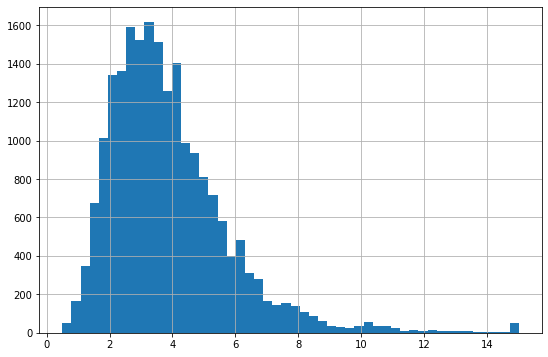

In [11]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

`StratifiedShuffleSplit`dan foydalanishdan avval `median_income` ustunidagi qiymatlarni bir nechta kategoriyalarga ajratib olishimiz kerak. Aynan shu kategoriyalar `StratifiedShuffleSplit` ichidagi split funksiyasiga uzatiladi va funksiya shu kategoriya asosida train va test set o'rtasidagi balansni saqlaydi.

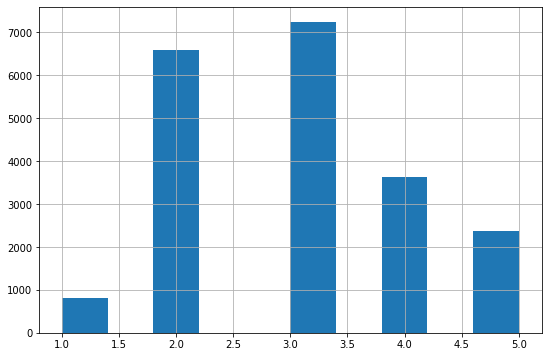

In [12]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [14]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

### 2.3 Ma'lumotlarni tahlil qilamiz.

Keling endi bevosita ma'lumotlarni tahlil qilishga o'taylik. Esingizda bo'lsa biz endi `train` set bilan ishlashimiz kerak. Bizda hozircha 2 ta alohida train set bo'lib qoldi:
- `train_set` - `train_test_split` yordamida bo'lingan (muvozanatsiz)
- `strat_train_set` - `StratifiedShuffleSplit` yordamida bo'lingan.

Biz ikkinchi setdan foydalanamiz. Qulaylik uchun bu setimizda nusxa ko'chirib olamiz.

In [15]:
housing = strat_train_set.copy()

### Vizualziasiya
Ma'lumotlarni tahlil qilishning eng qulay usuli bu grafiklar. Keling boshlanishiga uylarning geografik joylashuvini ko'ramiz.

Tushunarli bo'lishi uchun, Kalifronia shtati xaritasini ham chiqaramiz:

<img src="https://www.nationsonline.org/maps/USA/California_map.jpg" alt="California" width="600"/>

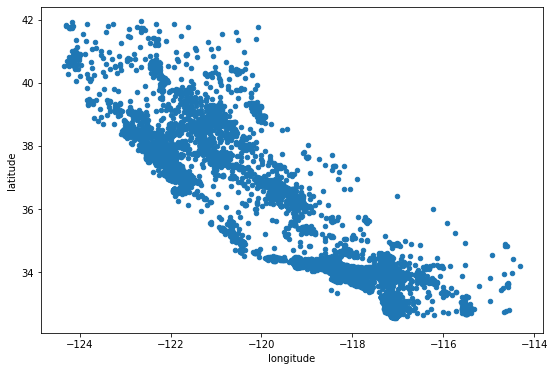

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

Yaxshi, lekin bu ko'rinihsda ko'p ma'lumot ololmaymiz. Yagona xulosamiz, okeanga yaqin aholi zichroq ekan.

Keling grafikka biroz ma'no beramiz.

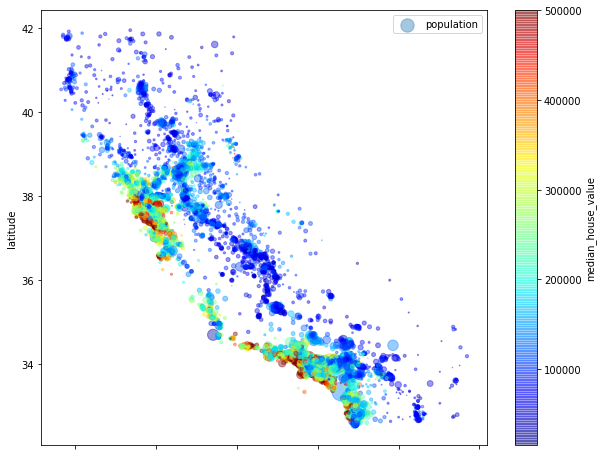

In [17]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=housing['population']/100, # nuqta radiusi aholi soniga qarab o'zgaradi
    label="population",
    c="median_house_value", # nuqta rangi uyning narxiga qarab o'zgaradi
    cmap="jet", # ranglar. Ko'k - daromadi kam, qizil - daromadi ko'p
    colorbar=True,
    figsize=(10,8)
)
plt.show()

### Korrelyasiya
Bizning asl maqsadimiz bizga berilgan ma'lumotlar orasida uyning narxiga ta'sir qiluvchi parametrlarni topish. Bunda esa bizga aynan korrelyasiya juda qo'l keladi.

Korrelysasiya haqida biz Data Analysis kursimizda batafsil to'xtalganmiz.

In [18]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
dtype: float64

Ko'rishimiz mumkinki, `median_house_value` va `median_income`, `total_rooms`, `housing_median_age` ustunlari orasida korrelyatsiya nisbatan kuchli.

`seabron` tarkibidagi `pairplot` funksiyasi yordamida korrelyasiya qiymatlarini grafik ko'rinishida chiqarishimiz ham mumkin.

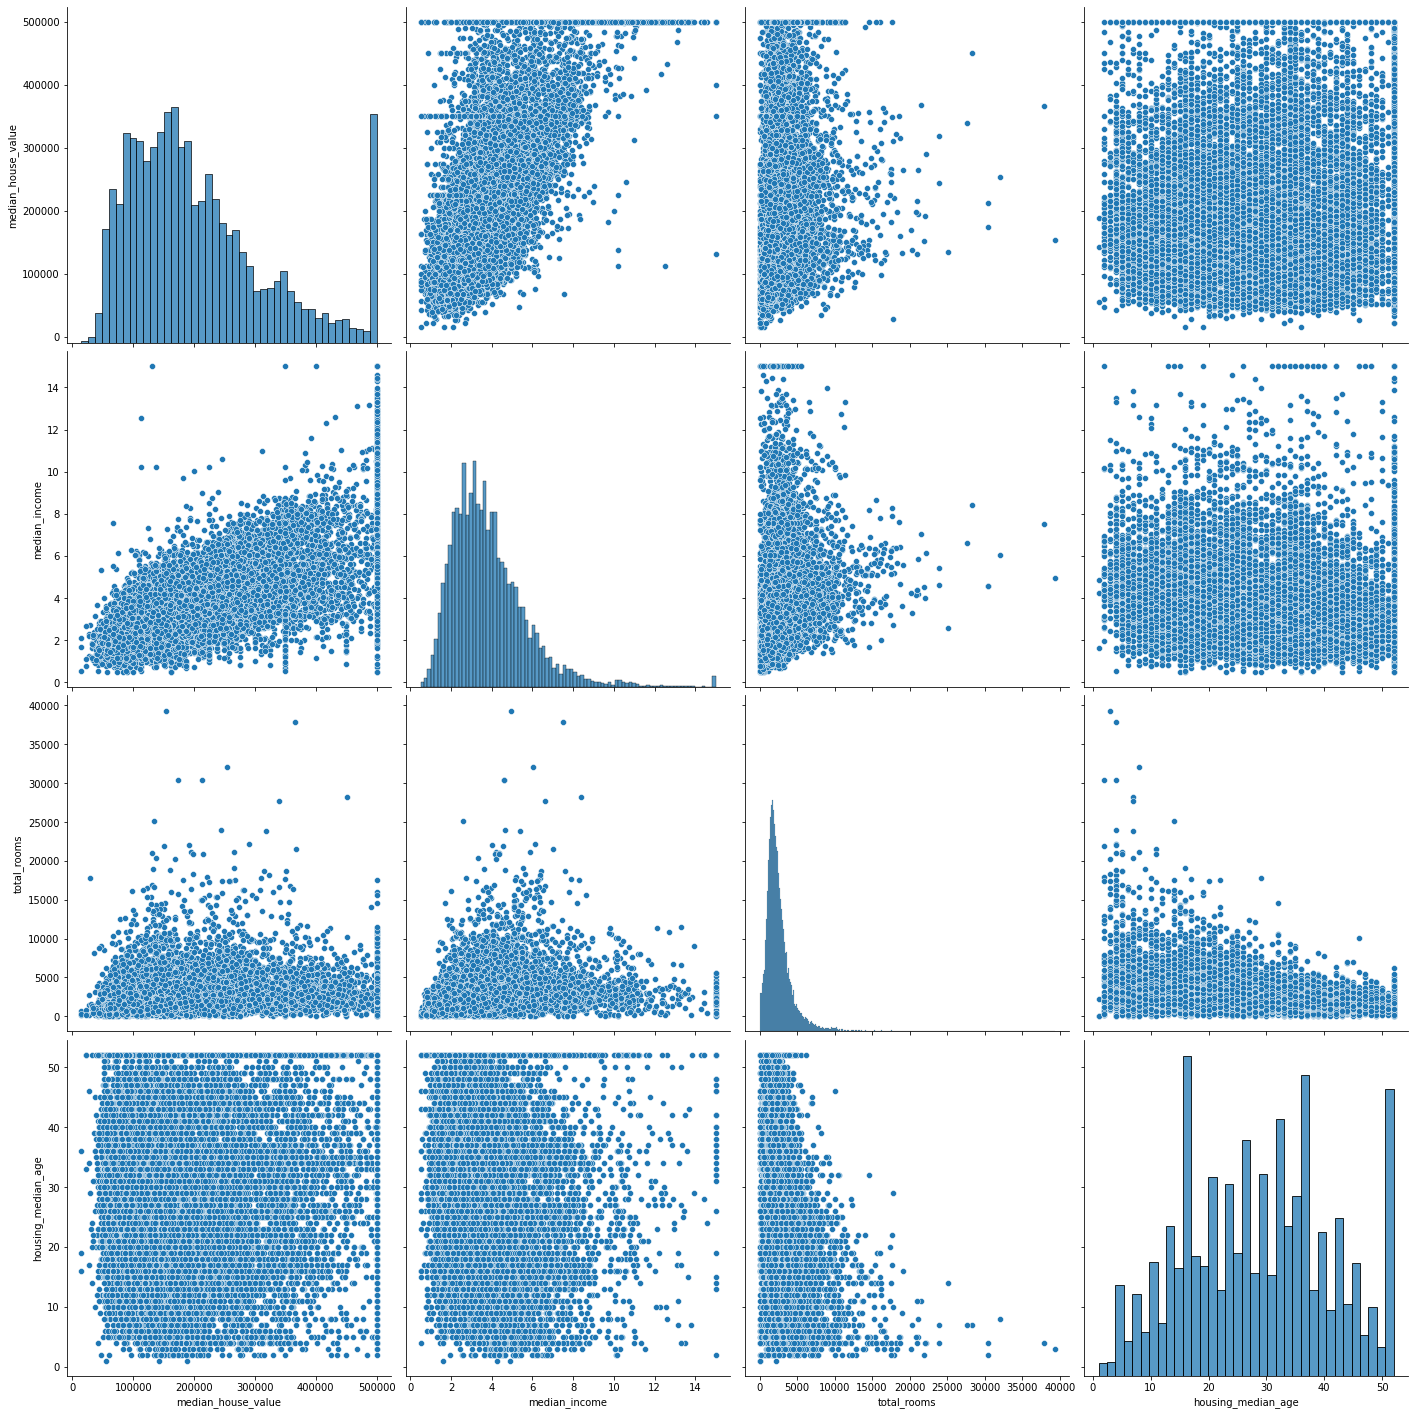

In [19]:
cols = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

Barcha ustunlar orasida `median_income` va uy narxi o'rtasida korrelyatsiya eng kuchli ekan, keling uni alohida chizaylik.

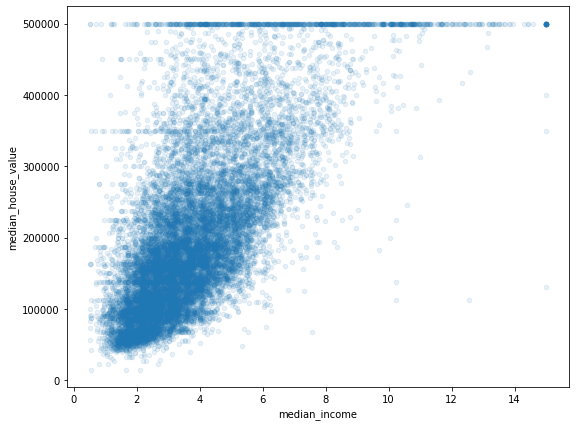

In [20]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha=0.1, figsize=(9,7))
plt.show()

Grafikda kuchli korrelyasiya borligini ko'rishimiz mumkin. Ya'ni hudud bo'yicha aholining daromadi oshgani sari, hududdagi narxlar ham oshgan. 

LEKIN, avval aytganimizdek 500,000\$ dan qimmat uylar 500mingda  chegaralab qo'yilgan. Undan tashqari 350ming va 450ming atrofida ham shunday chegarani ko'rishimiz mumkin (seizlar-sezilmas gorizontal chiziq).

Keyingi bosqichlarda bu qiymatlarni olib tashlashimiz kerak bo'ladi. Aks holda modelimiz ham xato ishlaydi.

### 2.4 Yangi parametrlar yaratamiz

Yuqorida `median_income` uylarning median bahosini topish uchun yaxshi parametr ekanini ko'rdik, lekin bu parametrning o'zi yetarli emas. Shunday holatlarda ba'zi parametrlani jamlab yangi parametrlar hosil qilishimiz mumkin.

Misol uchun, hududdagi jami xonalar soni (`total_rooms`) unchalik ham muhim emas, lekin jami xonalar sonini jami xonadonlar (`households`) soniga bo'lsak har bir xonadon uchun o'rtacha xonalar soni chiqadi (ya'ni har bir uyning o'rtacha xonalari soni) bu esa uyning bahosini aniqlashda muhim bo'lishi mumkin.

In [21]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [22]:
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
dtype: float64